### Import packages

In [38]:
library(GWmodel)      ### GW models
library(dplyr)
library(sp)           ## Data management
library(car)          ## vif
library(spdep)        ## Spatial autocorrelation
library(RColorBrewer) ## Visualization
library(classInt)     ## Class intervals
library(raster)       ## spatial data
library(grid)         # plot
library(gridExtra)    # Multiple plot
library(ggplot2)      # Multiple plot
library(gtable)
library(GGally)       # 相關係數圖矩陣（scatter plot matrix）
library(maptools)
library(MASS)
library(tmap)

### Function

#### pdf_plot

In [21]:

pdf_plot <- function(x){
  g = ggplot()+
    geom_histogram(aes(x = x, y = ..density..), 
                   fill = '#557C55', alpha = 0.8)+
    geom_density(aes(x = x, y = ..density..), 
                 color = '#062C30', size = 1)+
    theme_bw()
  
  return(g)
}


### Load datas

In [51]:
getwd()
path = '..\\..\\Roaming-Dogs-Data\\'
Variable_KS_df <- read.csv(paste0(path, "@Test_KS\\Variable.csv" ), fileEncoding = 'utf-8')
Variable_KS_shp<-shapefile(paste0(path, "@Test_KS\\Variable.shp" ),warnPRJ = F)

[1] "c:/@@Roaming_Dogs_Data_Analysis/Roaming-Dogs-Code/Model-fitting"

In [75]:
Variable_KS_df["Clinic"][is.na(Variable_KS_df["Clinic"])] = 0

### select Xy

In [76]:
col_X = c( "Market","Cluster","high_rat",   "mid_rat","low_rat","Hospital" ,  "Clinic", "M_F_RAT" ,
           "P_DEN",      "DEPENDENCY", "YOUN_DEP",   "OLD_DEP",    "AGING_IDX","Ele" ,"Ele_stu","Junior" ,   
           "Junior_stu", "Senior",     "Senior_stu", "TaxPayer" ,  "Income_tot", "Income_mea",
           "Income_med" ,"Income_Q1",  "Income_Q3",  "Income_sta", "Income_CV",  "Temple",    
           "Train.stat", "Train.crow" )
col_y = c('Nt')

In [65]:
crs(Variable_KS_shp)  <-  CRS('+init=EPSG:4326')
(crs(Variable_KS_shp))

CRS arguments: +proj=longlat +datum=WGS84 +no_defs 

#### Correlation 

In [77]:
corr = cor(Variable_KS_df[c(col_y,col_X)])
col_income = c( "Income_mea","Income_med" ,"Income_Q1", 
                "Income_Q3",  "Income_sta", "Income_CV")
corr_income = sort(corr[col_income,'Nt'])
idx = abs(corr[,'Nt'])>.15
col_X_02 = names(corr[idx,'Nt']) %>% tail(-1)

In [78]:
corr

,Nt,Market,Cluster,high_rat,mid_rat,low_rat,Hospital,Clinic,M_F_RAT,P_DEN,⋯,Income_tot,Income_mea,Income_med,Income_Q1,Income_Q3,Income_sta,Income_CV,Temple,Train.stat,Train.crow
Nt,1.000000000,0.054590691,0.38283190,-0.32718782,-0.136294946,0.35205116,-0.022786345,-0.003444542,0.36972436,-0.56894743,⋯,0.044195820,-0.322130927,-0.25878455,-0.21163406,-0.287398534,-0.30881554,-0.193522976,0.2612699712,-0.080172670,-0.080172670
Market,0.054590691,1.000000000,-0.12873190,0.07211707,-0.016209672,-0.06103337,0.334979643,0.432419094,-0.10019781,0.04421813,⋯,0.401549430,0.023990432,0.01806651,0.06357643,-0.006536636,0.06483936,0.138400544,0.1084427769,0.389931768,0.389931768
Cluster,0.382831897,-0.128731903,1.00000000,-0.61186128,0.058244217,0.54621784,-0.184856144,-0.182709457,0.68656680,-0.61249998,⋯,-0.158781486,-0.461217640,-0.37629232,-0.29098724,-0.403822560,-0.51685733,-0.554794652,0.4607550583,0.108031939,0.108031939
high_rat,-0.327187816,0.072117070,-0.61186128,1.00000000,0.019240184,-0.93369682,0.279087610,0.316230074,-0.75988288,0.44638908,⋯,0.353100630,0.872228096,0.84979564,0.66179521,0.867946042,0.81498730,0.505063057,-0.2274189582,-0.054481556,-0.054481556
mid_rat,-0.136294946,-0.016209672,0.05824422,0.01924018,1.000000000,-0.37596280,0.016981016,0.006568096,-0.19395984,0.01732810,⋯,0.006366069,-0.056249048,-0.01022159,0.03577555,-0.044253362,-0.02282622,0.082896108,0.2653257311,0.011468332,0.011468332
low_rat,0.352051163,-0.061033372,0.54621784,-0.93369682,-0.375962802,1.00000000,-0.264741587,-0.295436268,0.77372726,-0.41992194,⋯,-0.329535780,-0.788241988,-0.78393530,-0.62616831,-0.788569378,-0.74716060,-0.497783287,0.1157519909,0.046386687,0.046386687
Hospital,-0.022786345,0.334979643,-0.18485614,0.27908761,0.016981016,-0.26474159,1.000000000,0.724946609,-0.28102090,0.04311152,⋯,0.714178794,0.408293258,0.31410844,0.27168568,0.391334488,0.43495575,0.307231234,0.0022510570,-0.039626051,-0.039626051
Clinic,-0.003444542,0.432419094,-0.18270946,0.31623007,0.006568096,-0.29543627,0.724946609,1.000000000,-0.30708706,0.19619049,⋯,0.932874689,0.340504525,0.33693571,0.33441686,0.350613053,0.34657255,0.232563315,0.1093892293,-0.013217977,-0.013217977
M_F_RAT,0.369724358,-0.100197814,0.68656680,-0.75988288,-0.193959839,0.77372726,-0.281020902,-0.307087058,1.00000000,-0.54913383,⋯,-0.295203930,-0.594540206,-0.54613146,-0.41915235,-0.563798131,-0.63723189,-0.549527521,0.2093679080,-0.031760898,-0.031760898
P_DEN,-0.568947427,0.044218133,-0.61249998,0.44638908,0.017328097,-0.41992194,0.043111523,0.196190485,-0.54913383,1.00000000,⋯,0.196666381,0.345896082,0.32219376,0.36080424,0.330621321,0.30944515,0.171677505,-0.3151317424,-0.125869650,-0.125869650


In [79]:
sort(Variable_KS_df[,'high_rat'])

[1] 0.0937500 0.1258907 0.1299525 0.1386463 0.1415753 0.1574230 0.1665078
 [8] 0.1754967 0.1819721 0.1898058 0.1952798 0.2016238 0.2019002 0.2049979
[15] 0.2053534 0.2061942 0.2070332 0.2073171 0.2204473 0.2339623 0.2408587
[22] 0.2480916 0.2601253 0.2602263 0.2655882 0.2664820 0.2711138 0.2757341
[29] 0.2828380 0.2913557 0.2924360 0.2928957 0.2938365 0.2952098 0.2959262
[36] 0.3029909 0.3047016 0.3083451 0.3129074 0.3176397 0.3177645 0.3197279
[43] 0.3226005 0.3409962 0.3469891 0.3509656 0.3525809 0.3575736 0.3641457
[50] 0.3668096 0.3805785 0.3959500 0.3994061 0.4087948 0.4130922 0.4183579
[57] 0.4595766 0.5043999

### GLM_POISSON 

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Call:
glm(formula = Nt ~ ., family = poisson(), data = Variable_KS_df[, 
    c(col_y, col_X_02)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9864  -1.2933  -0.3625   1.1794   4.2733  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.176e+00  2.285e+00  -1.390   0.1646    
Cluster      1.116e-01  1.412e-01   0.790   0.4294    
high_rat     5.423e-01  1.626e+00   0.334   0.7387    
low_rat     -2.352e+00  1.264e+00  -1.860   0.0629 .  
M_F_RAT      6.121e-02  1.118e-02   5.473 4.42e-08 ***
P_DEN       -6.263e-05  6.393e-06  -9.797  < 2e-16 ***
DEPENDENCY   1.316e+01  8.705e+00   1.512   0.1306    
YOUN_DEP    -1.325e+01  8.708e+00  -1.521   0.1282    
OLD_DEP     -1.326e+01  8.705e+00  -1.523   0.1278    
Ele          7.775e-01  9.583e-02   8.113 4.94e-16 ***
Income_mea  -1.561e-02  6.160e-03  -2.534   0.0113 *  
Income_med   3.891e-03  3.931e-03   0.990   0.3223    
Income_Q1    1.068e-03  3.186e-03   0.335   0.7374    
In

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



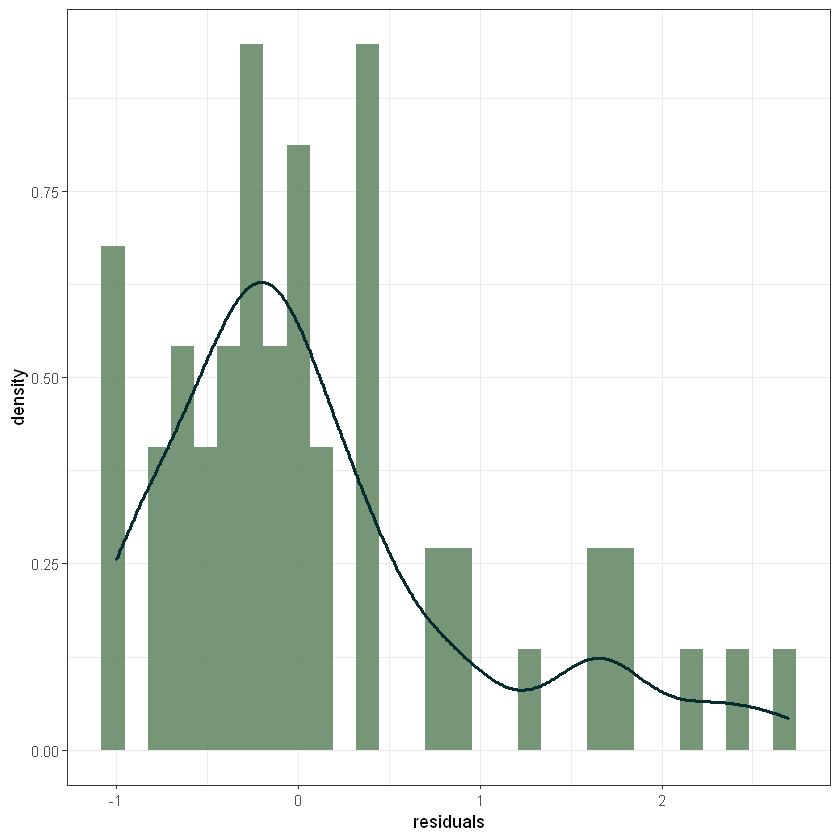

In [80]:
Fit_Po <-glm(Nt~.,data=Variable_KS_df[,c(col_y,col_X_02)],family=poisson())
summary(Fit_Po) #查看回归模型参数
pdf_plot(Fit_Po$residuals)+xlab('residuals')